In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Importando e tratando Dataset

In [2]:
# Carregando base de dados
df = pd.read_csv('streaming_data.csv')

In [3]:
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [4]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Devices_connected'] = df['Devices_connected'].fillna(df['Devices_connected'].mean())
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(df['Num_streaming_services'].mean())
df['Avg_rating'] = df['Avg_rating'].fillna(df['Avg_rating'].mean())
df['Time_on_platform'] = df['Time_on_platform'].fillna(df['Time_on_platform'].mean())

In [6]:
df.isna().sum()

Age                           0
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                   16736
User_id                       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33654 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     33654 non-null  float64
 1   Gender                  33654 non-null  object 
 2   Time_on_platform        33654 non-null  float64
 3   Devices_connected       33654 non-null  float64
 4   Subscription_type       33654 non-null  object 
 5   Num_streaming_services  33654 non-null  float64
 6   Num_active_profiles     33654 non-null  int64  
 7   Avg_rating              33654 non-null  float64
 8   Churned                 33654 non-null  float64
 9   User_id                 33654 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ MB


In [9]:
df = df.astype({'Age':'int',
                'Time_on_platform':'int',
                'Devices_connected':'int',
                'Num_streaming_services':'int',
                'Churned':'bool'})

# Análise Exploratória

#### Quantidade de Churn
Diferença considerável entre churn e não churn na base. Diferença de 17222, aplicação de balanceamento pode ser necessária.

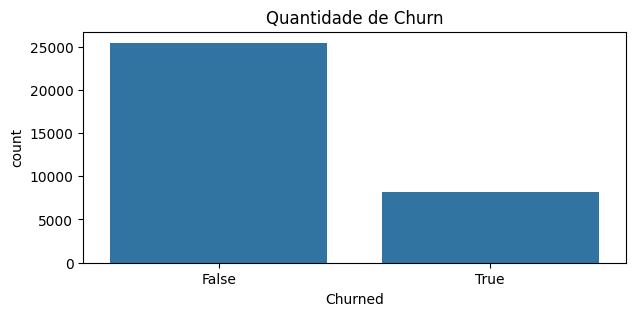

In [10]:
plt.figure(figsize=(7, 3))
plt.title('Quantidade de Churn')
sns.countplot(x=df['Churned'], data=df)
plt.show()

In [11]:
churn_count = df['Churned'].value_counts()[True]
n_churn_count = df['Churned'].value_counts()[False]

print(f'Churn: {churn_count}\n'
      f'Não Churn: {n_churn_count}\n'
      f'Diferença: {n_churn_count - churn_count}')

Churn: 8216
Não Churn: 25438
Diferença: 17222


#### Quantidade de Churn por Sexo e tipo de assinatura
A diferença entre pessoas churn entre sexos e tipos de assinaturas praticamente não se diferem

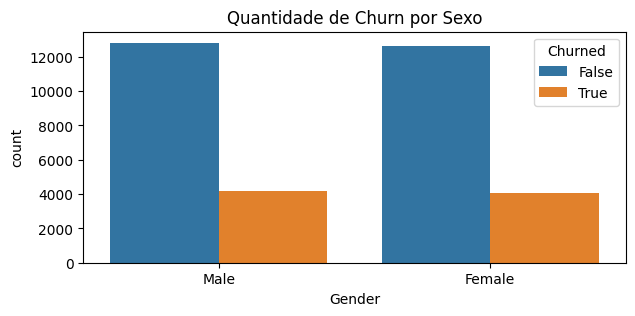

In [12]:
plt.figure(figsize=(7, 3))
plt.title('Quantidade de Churn por Sexo')
sns.countplot(df, x='Gender', hue='Churned')
plt.show()

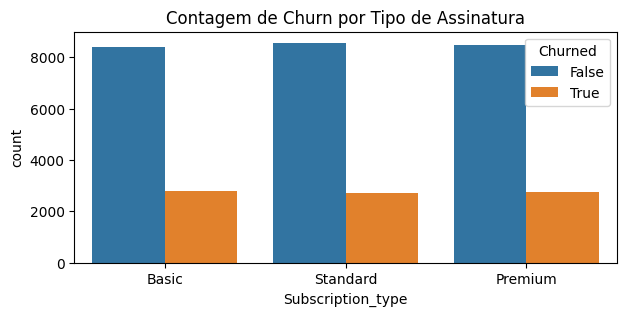

In [13]:
plt.figure(figsize=(7, 3))
plt.title('Contagem de Churn por Tipo de Assinatura')
sns.countplot(df, x='Subscription_type', hue='Churned')
plt.show()

#### Plotando correlação entre as variáveis
A ausência de correlação pode indicar que os dados não seguem uma forma linear.

In [14]:
df.drop(columns=['Gender', 'Subscription_type', 'User_id']).corr()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
Age,1.000000,-0.011065,0.002158,-0.010990,-0.002692,0.002075,-0.001654
Time_on_platform,-0.011065,1.000000,-0.004069,0.001092,-0.000959,-0.007876,-0.009410
Devices_connected,0.002158,-0.004069,1.000000,0.003756,-0.004294,0.000555,0.004768
Num_streaming_services,-0.010990,0.001092,0.003756,1.000000,-0.010863,-0.004348,0.005269
Num_active_profiles,-0.002692,-0.000959,-0.004294,-0.010863,1.000000,0.004779,0.007266
Avg_rating,0.002075,-0.007876,0.000555,-0.004348,0.004779,1.000000,0.004748
Churned,-0.001654,-0.009410,0.004768,0.005269,0.007266,0.004748,1.000000


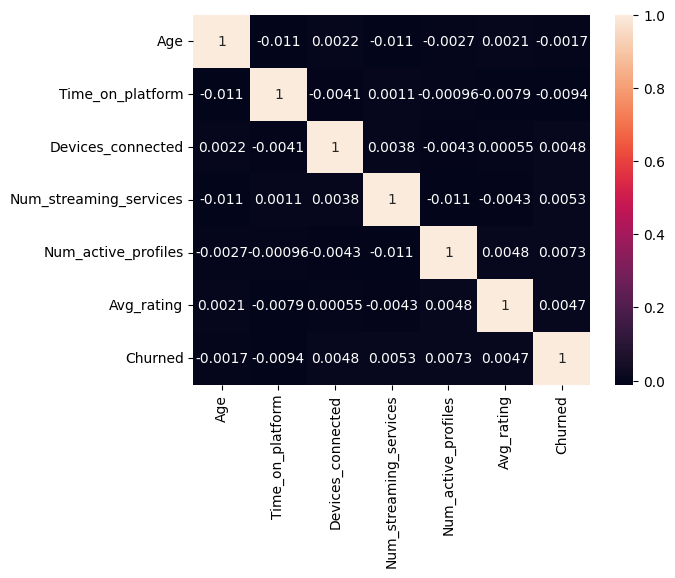

In [15]:
sns.heatmap(df.drop(columns=['Gender', 'Subscription_type', 'User_id']).corr(), annot=True);

#### Histograma para verificação de outliers

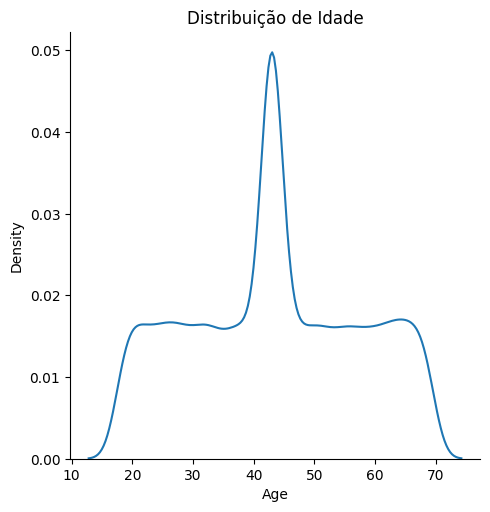

In [16]:
sns.displot(df['Age'], kind='kde')
plt.title('Distribuição de Idade')
plt.show()

# Separando e tratando as bases dos modelos

In [17]:
# Dividindo a base entre target e explicativas
X = df.drop(columns=['Churned', 'User_id'])
y = df.Churned.copy()
y = pd.DataFrame(y)

In [18]:
# Aplicando tratativa nas variáveis categóricas
X = pd.get_dummies(X)

In [19]:
# Separando bases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # Stratify para ajudar a balancear os dados.

## Construindo Modelo

In [20]:
# Construindo modelos
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train, y_train.values.ravel())

model_rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2)
model_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

Métricas

In [21]:
# Prevendo resultados do random Forest
predictions_rf = model_rf.predict(X_test)

# Printando métricas
print('Métrica Random Forest Classifier - No Tunning')
print('MSE:' ,mean_absolute_error(y_test.values.astype(float), predictions_rf.astype(float)))
print('RMSE', root_mean_squared_error(y_test.values.astype(float), predictions_rf.astype(float)))

Métrica Random Forest Classifier - No Tunning
MSE: 0.24403288105377835
RMSE 0.49399684316175374


In [25]:
# Printando métricas de Regressão Logística
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Métricas no Tunning - RF')

print('Acurácia: porcentagem total de previões corretas')
print(f"Acurácia (Treino): {accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados')
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('A precisão indica qual a chance do modelo dar verdade positivo ou negativo')
print(f"Precision (Treino): {precision_score(y_train, model_lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Recall mede a proporção de exemplos positivos identificados corretamente')
print(f"Recall (Treino): {recall_score(y_train, model_lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma média entre precisão e recall, que cria uma armonia entre eles')
print(f"F1-Score (Treino): {f1_score(y_train, model_lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.')
print(f"ROCAUC (Treino): {roc_auc_score(y_train, model_lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])}")

Métricas no Tunning - RF
Acurácia: porcentagem total de previões corretas
Acurácia (Treino): 0.5127138430190602
Acurácia (Teste): 0.5080717044666733

Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados
Acurácia Balanceada (Treino): 0.5117945927897366
Acurácia Balanceada (Teste): 0.507055937208976

A precisão indica qual a chance do modelo dar verdade positivo ou negativo
Precision (Treino): 0.2529756770743488
Precision (Teste): 0.24939903846153846

Recall mede a proporção de exemplos positivos identificados corretamente
Recall (Treino): 0.5099982611719701
Recall (Teste): 0.5050709939148073

É uma média entre precisão e recall, que cria uma armonia entre eles
F1-Score (Treino): 0.3381954453733064
F1-Score (Teste): 0.3339144428054177

É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.
ROCAUC (Treino): 0.5138944331976274
ROCAUC (Teste): 0.5060024834049863


## Tunando modelo

In [23]:
# Definindo hiperparâmetros para Regressão Logística
lr_tuned = LogisticRegression(class_weight='balanced') # Utiliza-se o parâmetro class_weight = balanced para balancear os valores da amostra

# Definindo hiperarâmetros para teste
param_grid = {'C': [0.001, 0.01, 0.1], # tirar pontas
              'penalty': ['l1', 'l2'], # somente l1 ou l2
              'solver': ['liblinear'],
              'max_iter': [5000, 10000]} # um por vez

lr_tuned.fit(X_train, y_train.values.ravel())

# Criando o objeto GridSearchCV
grid = GridSearchCV(lr_tuned, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train.values.ravel())

# Printando os melhores hiperparâmetros
print('Melhores hiperparâmetros:', grid.best_params_)

d:\Nova pasta\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Melhores hiperparâmetros: {'C': 0.001, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


Melhores hiperparâmetros: {'C': 0.001, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}

In [24]:
# Definindo hiperarâmetros para teste de RandomForest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = RandomForestClassifier()

rf_tuned.fit(X_train, y_train.values.ravel())

# Criando o objeto GridSearchCV
grid = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train.values.ravel())

print('Melhores hiperparâmetros:', grid.best_params_)

d:\Nova pasta\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores hiperparâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Melhores hiperparâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Refazendo modelos tunados com hiperparâmetros testados

Utilizar o parâmetro class_weight é importante para ajudar o balanceamento da amostra

In [46]:
# Construindo modelos tunados
model_lr = LogisticRegression(C=0.001,
                              max_iter=10000,
                              penalty='l1',
                              solver='liblinear',
                              class_weight='balanced')
model_lr.fit(X_train, y_train.values.ravel())


model_rf = RandomForestClassifier(max_depth=15,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100,
                                  class_weight='balanced')
model_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=15)

Obtivemos uma pequena melhora utilizando os hiperparâmetros testados.

Original:   
Métrica Random Forest Classifier - No Tunning   
MSE: 0.24403288105377835    
RMSE 0.49399684316175374

Tunado: 
Métrica Random Forest Classifier - Tunning  
MSE: 0.23591165692780033    
RMSE 0.48570737788075685

#### Testando métricas randomforest

In [47]:
# Prevendo resultados do random Forest
predictions_rf_tun = model_rf.predict(X_test)

# Printando métricas
print('Métrica Random Forest Classifier - Tunning')
print('MSE:' ,mean_absolute_error(y_test.values.ravel(), predictions_rf_tun.astype(float)))
print('RMSE', root_mean_squared_error(y_test.values.ravel(), predictions_rf_tun.astype(float)))

Métrica Random Forest Classifier - Tunning
MSE: 0.24700406061206298
RMSE 0.49699503077200174


Schema da matriz de confusão

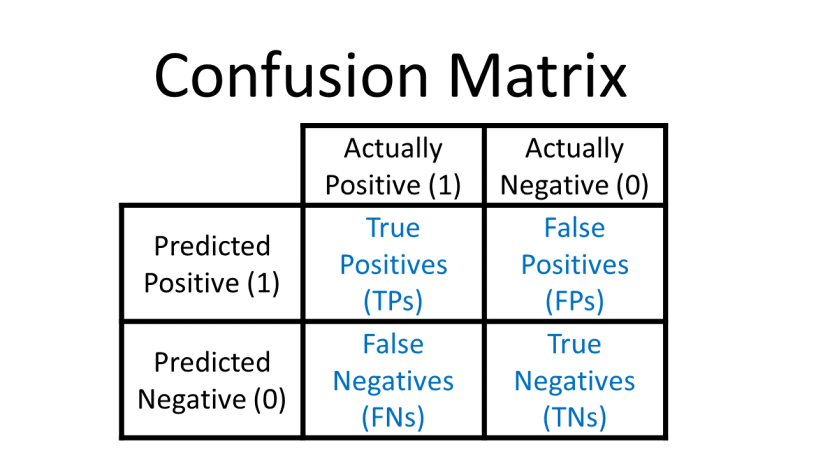

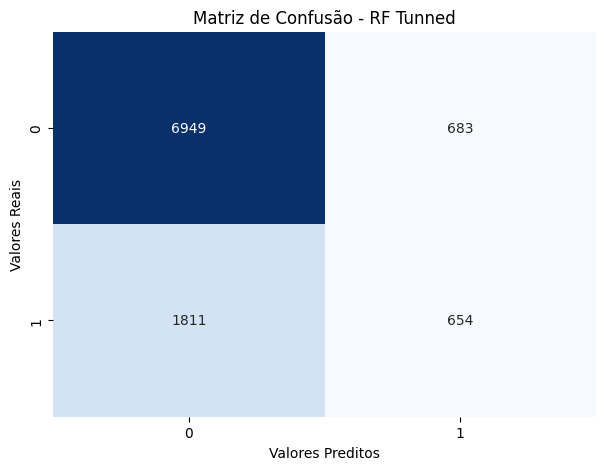

In [48]:
# Plotando matriz de confusão do modelo tunado
cm_rf = confusion_matrix(y_test.values.ravel(), predictions_rf_tun)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RF Tunned')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

In [49]:
# Realiza previsões no conjunto de Teste
# Adicionando valores da predição no dataframe
rf_data = X_test.assign(churned=y_test.values.ravel()).assign(label=predictions_rf_tun)
rf_data.head(10)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
6927,43,7394,4,2,3,2.080000,False,True,False,False,True,False,False
52714,43,4662,5,2,4,1.440000,True,False,True,False,False,False,False
57419,51,4385,2,2,4,2.580000,False,True,False,False,True,False,False
56224,28,7517,1,2,5,1.350000,True,False,False,True,False,True,False
65877,43,4385,2,2,5,2.630000,True,False,False,False,True,False,False
20051,31,5671,2,2,3,3.730000,True,False,True,False,False,False,False
12403,43,574,2,2,1,3.002252,True,False,False,True,False,False,False
61001,36,4385,2,2,2,3.540000,False,True,False,True,False,False,False
37774,68,1775,1,2,2,2.850000,True,False,False,False,True,False,False
14278,61,6666,2,2,2,3.002252,True,False,False,False,True,True,False


#### Testando métricas Logistic Regression

In [50]:
# Realiza previsões no conjunto de Teste
predictions_lr_tun = model_lr.predict(X_test)

# Adicionando valores da predição no dataframe
lr_data = X_test.assign(churned=y_test.values.ravel()).assign(label=predictions_rf_tun)
lr_data.head(10)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
6927,43,7394,4,2,3,2.080000,False,True,False,False,True,False,False
52714,43,4662,5,2,4,1.440000,True,False,True,False,False,False,False
57419,51,4385,2,2,4,2.580000,False,True,False,False,True,False,False
56224,28,7517,1,2,5,1.350000,True,False,False,True,False,True,False
65877,43,4385,2,2,5,2.630000,True,False,False,False,True,False,False
20051,31,5671,2,2,3,3.730000,True,False,True,False,False,False,False
12403,43,574,2,2,1,3.002252,True,False,False,True,False,False,False
61001,36,4385,2,2,2,3.540000,False,True,False,True,False,False,False
37774,68,1775,1,2,2,2.850000,True,False,False,False,True,False,False
14278,61,6666,2,2,2,3.002252,True,False,False,False,True,True,False


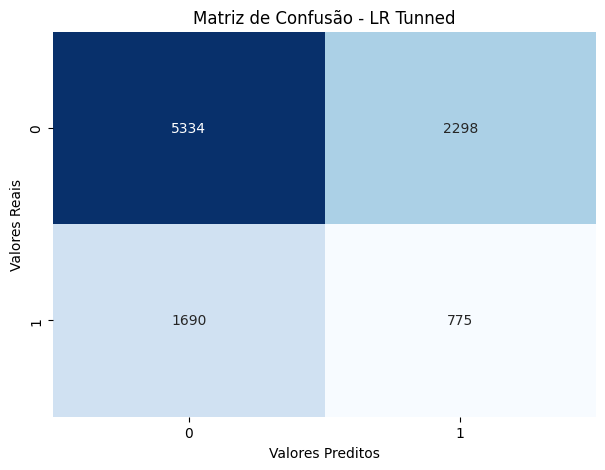

In [51]:
# Plotando matriz de confusão do modelo tunado
cm_rf = confusion_matrix(y_test.values.ravel(), predictions_lr_tun)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - LR Tunned')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

A métrica de acurácia já indica que o modelo performa melhor que a aleatoriedade do primeiro modelo.

In [52]:
# Printando métricas de Regressão Logística
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Métricas Tunning - RF')

print('Acurácia: porcentagem total de previões corretas')
print(f"Acurácia (Treino): {accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados')
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('A precisão indica qual a chance do modelo dar verdade positivo ou negativo')
print(f"Precision (Treino): {precision_score(y_train, model_lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Recall mede a proporção de exemplos positivos identificados corretamente')
print(f"Recall (Treino): {recall_score(y_train, model_lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma média entre precisão e recall, que cria uma armonia entre eles')
print(f"F1-Score (Treino): {f1_score(y_train, model_lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.')
print(f"ROCAUC (Treino): {roc_auc_score(y_train, model_lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])}")

Métricas Tunning - RF
Acurácia: porcentagem total de previões corretas
Acurácia (Treino): 0.6035573290317103
Acurácia (Teste): 0.605031197385362

Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados
Acurácia Balanceada (Treino): 0.5061978438258998
Acurácia Balanceada (Teste): 0.5066504968936176

A precisão indica qual a chance do modelo dar verdade positivo ou negativo
Precision (Treino): 0.2515923566878981
Precision (Teste): 0.25219655060201757

Recall mede a proporção de exemplos positivos identificados corretamente
Recall (Treino): 0.3159450530342549
Recall (Teste): 0.3144016227180527

É uma média entre precisão e recall, que cria uma armonia entre eles
F1-Score (Treino): 0.2801202497494797
F1-Score (Teste): 0.27988443481401226

É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.
ROCAUC (Treino): 0.5077584922745784
ROCAUC (Teste): 0.50131032569176


# Aplicando a técnica de SMOTE para auxiliar no balancecamento das classes

## Rebalanceando amostrar de treino

In [53]:
# Balanceando amostras
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
# Treinando novamente modelos com amostras resampled
model_lr = LogisticRegression(C=0.001,
                              max_iter=10000,
                              penalty='l1',
                              solver='liblinear',
                              class_weight='balanced')
model_lr.fit(X_train_resampled, y_train_resampled.values.ravel())


model_rf = RandomForestClassifier(max_depth=15,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100,
                                  class_weight='balanced')
model_rf.fit(X_train_resampled, y_train_resampled.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=15)

## Plotando resultados

Random Forest

In [59]:
# Prevendo resultados do random Forest
predictions_rf_tun = model_rf.predict(X_test)

# Printando métricas
print('Métrica Random Forest Classifier - Tunning/Resampled')
print('MSE:' ,mean_absolute_error(y_test.values.ravel(), predictions_rf_tun.astype(float)))
print('RMSE', root_mean_squared_error(y_test.values.ravel(), predictions_rf_tun.astype(float)))

Métrica Random Forest Classifier - Tunning
MSE: 0.2438348024165594
RMSE 0.4937963167304505


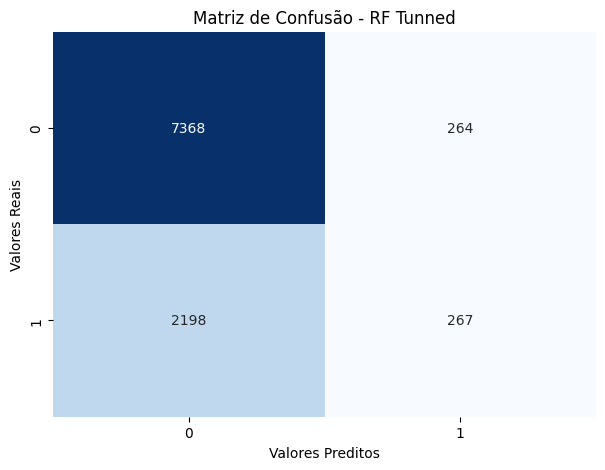

In [60]:
# Plotando matriz de confusão do modelo tunado/Resampled
cm_rf = confusion_matrix(y_test.values.ravel(), predictions_rf_tun)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RF Tunned')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

In [63]:
# Realiza previsões no conjunto de Teste
# Adicionando valores da predição no dataframe
rf_data = X_test.assign(churned=y_test.values.ravel()).assign(label=predictions_rf_tun)
rf_data.head(15)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
6927,43,7394,4,2,3,2.080000,False,True,False,False,True,False,False
52714,43,4662,5,2,4,1.440000,True,False,True,False,False,False,False
57419,51,4385,2,2,4,2.580000,False,True,False,False,True,False,False
56224,28,7517,1,2,5,1.350000,True,False,False,True,False,True,False
65877,43,4385,2,2,5,2.630000,True,False,False,False,True,False,False
20051,31,5671,2,2,3,3.730000,True,False,True,False,False,False,False
12403,43,574,2,2,1,3.002252,True,False,False,True,False,False,False
61001,36,4385,2,2,2,3.540000,False,True,False,True,False,False,True
37774,68,1775,1,2,2,2.850000,True,False,False,False,True,False,False
14278,61,6666,2,2,2,3.002252,True,False,False,False,True,True,False


Logistic Regressor  

In [64]:
# Realiza previsões no conjunto de Teste
predictions_lr_tun = model_lr.predict(X_test)

# Adicionando valores da predição no dataframe
lr_data = X_test.assign(churned=y_test.values.ravel()).assign(label=predictions_rf_tun)
lr_data.head(10)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
6927,43,7394,4,2,3,2.080000,False,True,False,False,True,False,False
52714,43,4662,5,2,4,1.440000,True,False,True,False,False,False,False
57419,51,4385,2,2,4,2.580000,False,True,False,False,True,False,False
56224,28,7517,1,2,5,1.350000,True,False,False,True,False,True,False
65877,43,4385,2,2,5,2.630000,True,False,False,False,True,False,False
20051,31,5671,2,2,3,3.730000,True,False,True,False,False,False,False
12403,43,574,2,2,1,3.002252,True,False,False,True,False,False,False
61001,36,4385,2,2,2,3.540000,False,True,False,True,False,False,True
37774,68,1775,1,2,2,2.850000,True,False,False,False,True,False,False
14278,61,6666,2,2,2,3.002252,True,False,False,False,True,True,False


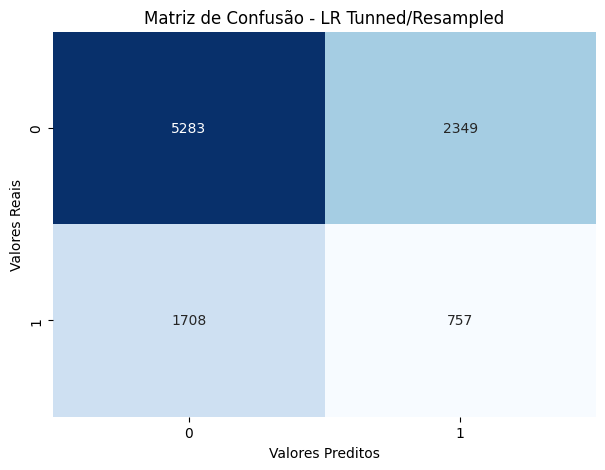

In [65]:
# Plotando matriz de confusão do modelo tunado resampled
cm_rf = confusion_matrix(y_test.values.ravel(), predictions_lr_tun)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - LR Tunned/Resampled')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

In [66]:
# Printando métricas de Regressão Logística
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Métricas Tunning - RF')

print('Acurácia: porcentagem total de previões corretas')
print(f"Acurácia (Treino): {accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados')
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model_lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('A precisão indica qual a chance do modelo dar verdade positivo ou negativo')
print(f"Precision (Treino): {precision_score(y_train, model_lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('Recall mede a proporção de exemplos positivos identificados corretamente')
print(f"Recall (Treino): {recall_score(y_train, model_lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma média entre precisão e recall, que cria uma armonia entre eles')
print(f"F1-Score (Treino): {f1_score(y_train, model_lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, model_lr.predict(X_test))}")
print("====================================\n")

print('É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.')
print(f"ROCAUC (Treino): {roc_auc_score(y_train, model_lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])}")

Métricas Tunning - RF
Acurácia: porcentagem total de previões corretas
Acurácia (Treino): 0.6017319692660356
Acurácia (Teste): 0.5981974844013073

Acurácia balanceada tenta corrigir o desbalanceamento no conjunto de dados
Acurácia Balanceada (Treino): 0.49863339991581834
Acurácia Balanceada (Teste): 0.4996581863064029

A precisão indica qual a chance do modelo dar verdade positivo ou negativo
Precision (Treino): 0.24244573698396935
Precision (Teste): 0.24372182871860915

Recall mede a proporção de exemplos positivos identificados corretamente
Recall (Treino): 0.2971657103112502
Recall (Teste): 0.30709939148073023

É uma média entre precisão e recall, que cria uma armonia entre eles
F1-Score (Treino): 0.26703125
F1-Score (Teste): 0.27176449470472086

É uma medida que indica a capacidade do modelo de distinguir entre classes, quanto mais próximo de 1, melhor.
ROCAUC (Treino): 0.49726899216507875
ROCAUC (Teste): 0.49993597471519513


# Criando previsão com o modelo

In [70]:
def prev_cliente(Idade, Tempo_Na_Plataforma, Dispositivos_Conectados, Num_servicos_streming,
                 Num_usuarios_ativos, Media_Avaliacao, Genero_Feminino=False, Genero_Masculino=False,
                 Assinatura_Basica=False, Assinatura_Premium=False,
                 Assinatura_Padrao=False):
    """
    Insira as informações do cliente a ser previsto o resultado de Churn
    """
    dados_cliente = {
        'Age': [Idade],
        'Time_on_platform': [Tempo_Na_Plataforma],
        'Devices_connected': [Dispositivos_Conectados],
        'Num_streaming_services': [Num_servicos_streming],
        'Num_active_profiles': [Num_usuarios_ativos],
        'Avg_rating': [Media_Avaliacao],
        'Gender_Female': [Genero_Feminino],
        'Gender_Male': [Genero_Masculino],
        'Subscription_type_Basic': [Assinatura_Basica],
        'Subscription_type_Premium': [Assinatura_Premium],
        'Subscription_type_Standard': [Assinatura_Padrao]
    }

    df_cliente_prev = pd.DataFrame(dados_cliente)
    return df_cliente_prev


def genero(genero):
    if genero == 'M':
        gender_params = {'Genero_Feminino':False,
                  'Genero_Masculino': True}
        return gender_params
    else:
        gender_params = {'Genero_Feminino':True,
                  'Genero_Masculino': False}
        return gender_params    


def assinatura(assinat):
    if assinat == 'Basic':
        assinatura = {'Subscription_type_Basic':True,
                      'Subscription_type_Premium':False,
                      'Subscription_type_Standard':False}
        return assinatura
    elif assinat == 'Premium':
        assinatura = {'Subscription_type_Basic':False,
                      'Subscription_type_Premium':True,
                      'Subscription_type_Standard':False}
        return assinatura
    elif assinat == 'Standard':
        assinatura = {'Subscription_type_Basic':False,
                      'Subscription_type_Premium':False,
                      'Subscription_type_Standard':True}
        return assinatura
    else:
        return print('Escolha entre as opções - Basic, Premium ou Standard')

In [73]:
# Digite os dados do cliente para previsão do resultado
Idade = int(input('Digite a idade: '))
Tempo_Na_Plataforma = int(input('Tempo na pltaforma (minutos): '))
Devices_connected = int(input('Quantidade de dispositivos conectados: '))
Num_streaming_services = int(input('Número de serviços de streaming: '))
Num_active_profiles = int(input('Número de usuários ativos: '))
Avg_rating = float(input('Média de avaliação: '))
Gender = genero(input('Digite o gênero (M/F): ').upper())
Subscribe = assinatura(input('Digite o tipo de assinatura: ').title())

df_cliente = prev_cliente(Idade, Tempo_Na_Plataforma, Devices_connected, Num_streaming_services,
                          Num_active_profiles, Avg_rating, Genero_Masculino=Gender['Genero_Masculino'],
                          Genero_Feminino=Gender['Genero_Feminino'], Assinatura_Basica=Subscribe['Subscription_type_Basic'],
                          Assinatura_Padrao=Subscribe['Subscription_type_Standard'], Assinatura_Premium=Subscribe['Subscription_type_Premium'])

In [77]:
previsao_churn_rf = model_rf.predict(df_cliente)

previsao_churn_rf_valor = previsao_churn_rf

previsao_churn_rf_valor = previsao_churn_rf_valor

# Converte o valor em booleano
is_churn = bool(previsao_churn_rf_valor)

if is_churn:
    print('O cliente fará churn.')
else:
    print('O cliente não fará churn.')

O cliente não fará churn.


In [78]:
# Printando informações imputadas
df_cliente.assign(churn_pred=bool(previsao_churn_rf_valor))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn_pred
0,45,1222,2,1,2,4.5,False,True,False,True,False,False
